In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [48]:
# Load the dataset
df = pd.read_csv('mydata/drug.csv')

In [49]:
df.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [51]:
df['Drug'].count()

np.int64(200)

In [52]:
df['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [53]:
df['Drug'] = df['Drug'].str.upper()


In [54]:
df['Drug'].value_counts()

,count
Drug,
DRUGY,91
DRUGX,54
DRUGA,23
DRUGC,16
DRUGB,16


In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [56]:
# Encode target variable
target_le = LabelEncoder()
df['Drug'] = target_le.fit_transform(df['Drug'])


In [57]:
# Normalize numerical columns
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])


In [58]:
import pickle
import os

# Save encoders and scaler
import os
os.makedirs('models', exist_ok=True)

with open('models/feature_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('models/target_encoder.pkl', 'wb') as f:
    pickle.dump(target_le, f)

with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



In [14]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,0,0,1.286522,4
1,0.162699,1,1,0,-0.415145,2
2,0.162699,1,1,0,-0.828558,2
3,-0.988614,0,2,0,-1.149963,3
4,1.011034,0,1,0,0.271794,4


In [15]:
Drug_classes = ["DRUGA","DRUGB","DRUGC","DRUGX","DRUGY"]


In [16]:
Drug_classes = ["DRUGA", "DRUGB", "DRUGC", "DRUGX", "DRUGY"]

# Print first 10 rows with class names
for index, row in df.head(10).iterrows():
    print('[', round(row['Age'], 2), row['Sex'], row['BP'], row['Cholesterol'], int(row['Na_to_K']), row['Drug'], ']', Drug_classes[int(row['Drug'])])


[ -1.29 0.0 0.0 0.0 1 4.0 ] DRUGY
[ 0.16 1.0 1.0 0.0 0 2.0 ] DRUGC
[ 0.16 1.0 1.0 0.0 0 2.0 ] DRUGC
[ -0.99 0.0 2.0 0.0 -1 3.0 ] DRUGX
[ 1.01 0.0 1.0 0.0 0 4.0 ] DRUGY
[ -1.35 0.0 2.0 0.0 -1 3.0 ] DRUGX
[ 0.28 0.0 2.0 0.0 0 4.0 ] DRUGY
[ -0.2 1.0 1.0 0.0 0 2.0 ] DRUGC
[ 0.95 1.0 2.0 0.0 0 4.0 ] DRUGY
[ -0.08 1.0 1.0 1.0 0 4.0 ] DRUGY


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
label = 'Drug'

In [19]:
# Split data 70%-30% into training set and test set

X_train, X_test,y_train,y_test = train_test_split(df[features].values, df[label].values, test_size = 0.30, random_state=0)


print ('Training Set: %d, Test Set: %d \n' % (len(X_train), len(X_test)))
print("Sample of features and labels:")

Training Set: 140, Test Set: 60 

Sample of features and labels:


In [20]:
# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(X_train[n], y_train[n], '(' + Drug_classes[y_train[n]] + ')')

[0.46567567 1.         1.         1.         2.33663776] 4 (DRUGY)
[0.82924809 0.         1.         0.         3.07561832] 4 (DRUGY)
[ 0.88984349  0.          2.          0.         -0.30537382] 3 (DRUGX)
[-0.74623239  0.          0.          1.          1.37242427] 4 (DRUGY)
[ 1.67758373  0.          1.          1.         -0.20018185] 3 (DRUGX)
[-0.9280186   0.          0.          0.          1.85480857] 4 (DRUGY)
[ 1.43520212  0.          0.          1.         -0.81815   ] 1 (DRUGB)
[-1.41278182  0.          0.          1.          1.74129005] 4 (DRUGY)
[ 1.37460672  1.          2.          1.         -0.71975804] 3 (DRUGX)
[ 0.40508027  0.          2.          0.         -0.34520245] 3 (DRUGX)
[ 1.49579753  0.          2.          0.         -0.83535819] 3 (DRUGX)
[1.0716297 1.        2.        0.        0.0707083] 4 (DRUGY)
[-0.56444618  0.          0.          0.         -0.44276176] 0 (DRUGA)
[ 0.04150785  0.          0.          0.         -0.44831279] 0 (DRUGA)
[-0.32206457

In [21]:
for n in range(0, 25):
    print(X_train[n], y_train[n], '(' + Drug_classes[int(y_train[n])] + ')')


[0.46567567 1.         1.         1.         2.33663776] 4 (DRUGY)
[0.82924809 0.         1.         0.         3.07561832] 4 (DRUGY)
[ 0.88984349  0.          2.          0.         -0.30537382] 3 (DRUGX)
[-0.74623239  0.          0.          1.          1.37242427] 4 (DRUGY)
[ 1.67758373  0.          1.          1.         -0.20018185] 3 (DRUGX)
[-0.9280186   0.          0.          0.          1.85480857] 4 (DRUGY)
[ 1.43520212  0.          0.          1.         -0.81815   ] 1 (DRUGB)
[-1.41278182  0.          0.          1.          1.74129005] 4 (DRUGY)
[ 1.37460672  1.          2.          1.         -0.71975804] 3 (DRUGX)
[ 0.40508027  0.          2.          0.         -0.34520245] 3 (DRUGX)
[ 1.49579753  0.          2.          0.         -0.83535819] 3 (DRUGX)
[1.0716297 1.        2.        0.        0.0707083] 4 (DRUGY)
[-0.56444618  0.          0.          0.         -0.44276176] 0 (DRUGA)
[ 0.04150785  0.          0.          0.         -0.44831279] 0 (DRUGA)
[-0.32206457

In [22]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

# Prepare Data for Pytorch

In [23]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(X_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x, train_y)
train_loader = td.DataLoader(train_ds, batch_size =20, shuffle = False, num_workers= 1)

In [24]:
# create a dataset and loader for the test data and labels
test_x = torch.Tensor(X_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds,batch_size = 20, shuffle = False, num_workers =1)

# Define a Neural Network

In [25]:
# Number of hidden layer nodes
h1 = 10

# define neural network
class Drug(nn.Module):
  def __init__(self):
    super(Drug,self).__init__()
    self.fc1 = nn.Linear(len(features), h1)
    self.fc2 = nn.Linear(h1, h1)
    self.fc3 = nn.Linear(h1, len(Drug_classes))

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  # create a model instance from the network

model = Drug()
print(model)


Drug(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
)


# Train the Model

In [26]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # GLOBAL criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)  # define before training


In [27]:
def train(model, train_loader, optimizer):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Training set: Average loss: {avg_loss:.6f}")
    return avg_loss


In [28]:
def test(model, test_loader):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(output, 1)
            correct += (predicted == target).sum().item()

    avg_loss = total_loss / len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Validation set: Average loss: {avg_loss:.6f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n")

    return avg_loss, accuracy


In [29]:
epoch_nums = []
training_loss = []
validation_loss = []
validation_accuracy = []

epochs = 50
for epoch in range(1, epochs + 1):
    print(f"Epoch: {epoch}")

    # Train on training data
    train_loss = train(model, train_loader, optimizer)

    # Test on validation data
    test_loss, accuracy = test(model, test_loader)

    # Log metrics
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    validation_accuracy.append(accuracy)


Epoch: 1
Training set: Average loss: 1.743217
Validation set: Average loss: 1.767634, Accuracy: 4/60 (7%)

Epoch: 2
Training set: Average loss: 1.730020
Validation set: Average loss: 1.752908, Accuracy: 6/60 (10%)

Epoch: 3
Training set: Average loss: 1.717180
Validation set: Average loss: 1.738341, Accuracy: 8/60 (13%)

Epoch: 4
Training set: Average loss: 1.704375
Validation set: Average loss: 1.723846, Accuracy: 8/60 (13%)

Epoch: 5
Training set: Average loss: 1.691249
Validation set: Average loss: 1.709154, Accuracy: 10/60 (17%)

Epoch: 6
Training set: Average loss: 1.677551
Validation set: Average loss: 1.693926, Accuracy: 14/60 (23%)

Epoch: 7
Training set: Average loss: 1.662949
Validation set: Average loss: 1.677373, Accuracy: 16/60 (27%)

Epoch: 8
Training set: Average loss: 1.647155
Validation set: Average loss: 1.658894, Accuracy: 18/60 (30%)

Epoch: 9
Training set: Average loss: 1.629141
Validation set: Average loss: 1.638636, Accuracy: 17/60 (28%)

Epoch: 10
Training set: 

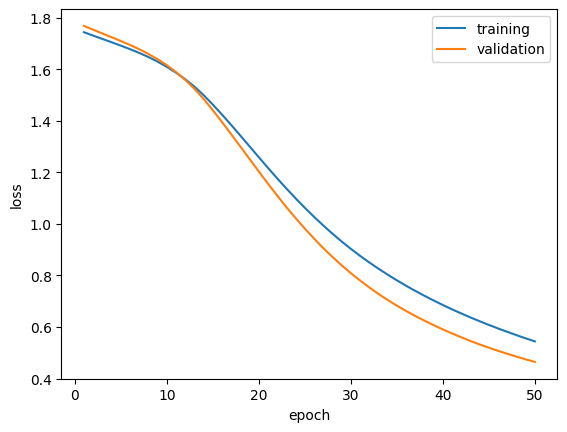

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

# View the learned weights and biases

In [30]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.09746232  0.42561242 -0.6092973  -0.23486489 -0.06819417]
 [-0.09481237  0.23622899  0.6364179   0.225275    0.47706988]
 [-0.37326172  0.0868539  -0.7424786  -0.12931967 -0.384404  ]
 [-0.12835766  0.13298881  0.51253057 -0.06788027 -0.5533826 ]
 [ 0.08134427  0.21739165  0.16609801  0.4951351  -0.21212508]
 [ 0.35768893  0.48429397 -0.29481888 -0.15536736 -0.19914688]
 [-0.37094718  0.4955041  -0.45514846 -0.1750475  -0.7078793 ]
 [-0.40251228 -0.23140056  0.39730725  0.32637316  0.5107427 ]
 [ 0.00868556 -0.03816822  0.42147404 -0.06328812 -0.7691236 ]
 [-0.26406124  0.18054844  0.50924027  0.04320412 -0.33473903]]
fc1.bias 
 [ 0.58195525  0.7663244   0.42935085  0.12449931  0.20676494 -0.15920457
  0.32264763 -0.25943366  0.01399136 -0.2589732 ]
fc2.weight 
 [[ 0.19700378 -0.0204576   0.12409541  0.23258346  0.06288509 -0.29793468
   0.35361093 -0.08746785  0.5783153   0.4393111 ]
 [-0.56635785  0.14303617 -0.23531997  0.51490843  0.309077   -0.03540957
  -0.20874

# Evaluate model performance

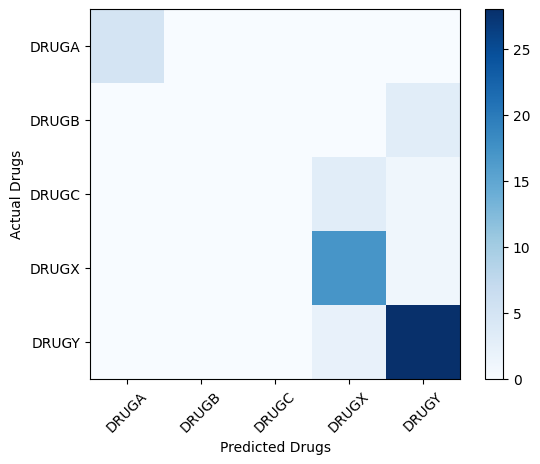

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(X_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(Drug_classes))
plt.xticks(tick_marks, Drug_classes, rotation=45)
plt.yticks(tick_marks, Drug_classes)
plt.xlabel("Predicted Drugs")
plt.ylabel("Actual Drugs")
plt.show()

# Save the trained Model

In [35]:
# Save the model weights
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model weights
model_file = 'models/Drug_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('Model saved as', model_file)


Model saved as models/Drug_classifier.pt


In [60]:
# import pickle
# import torch
# import numpy as np

# # Load encoders and scaler from the full path
# with open('/content/models/feature_encoders.pkl', 'rb') as f:
#     feature_encoders = pickle.load(f)

# with open('/content/models/label_encoder.pkl', 'rb') as f:
#     target_encoder = pickle.load(f)

# with open('/content/models/scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)


In [61]:
import pickle
import torch

# Load encoders and scaler
with open('models/feature_encoders.pkl', 'rb') as f:
    feature_encoders = pickle.load(f)

with open('models/target_encoder.pkl', 'rb') as f:
    target_encoder = pickle.load(f)

with open('models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


In [39]:
import torch.nn as nn

class Drug(nn.Module):
    def __init__(self):
        super(Drug, self).__init__()
        self.fc1 = nn.Linear(5, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the trained model weights
model = Drug()
model.load_state_dict(torch.load('models/Drug_classifier.pt'))
model.eval()


Drug(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
)

# prepare the Sample

In [59]:
sample = {'Age': 23, 'Sex': 'M', 'BP': 'LOW', 'Cholesterol': 'HIGH', 'Na_to_K': 21.220}


# Preprocess new sample

In [62]:
sample = {'Age': 23, 'Sex': 'M', 'BP': 'LOW', 'Cholesterol': 'HIGH', 'Na_to_K': 21.220}

# Encode categorical features
encoded_features = []
for col in ['Sex', 'BP', 'Cholesterol']:
    encoder = feature_encoders[col]
    value = sample[col]
    encoded_value = encoder.transform([value])[0]
    encoded_features.append(encoded_value)

# Add numerical values
numeric_features = [sample['Age'], sample['Na_to_K']]
numeric_scaled = scaler.transform([numeric_features])[0]  # note the [[]]

# Combine all features
final_features = encoded_features[:1] + [numeric_scaled[0]] + encoded_features[1:] + [numeric_scaled[1]]
# order: Sex, Age, BP, Cholesterol, Na_to_K

# Convert to tensor
x = torch.Tensor([final_features]).float()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
# Predict
_, predicted = torch.max(model(x).data, 1)
predicted_class = target_encoder.inverse_transform([predicted.item()])[0]

print('Prediction:', predicted_class)


Prediction: DRUGY
